# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [37]:
# Imports for all problems
import numpy as np
from sympy import Matrix, latex, Rational, symbols, simplify, expand, cos, sin, pi, sqrt, acos, Eq, solve, gcd
from sympy.polys.domains import GF
from IPython.display import display, Math
import random

# variable symbols
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')

def mprint(matrix):
    display(Math(latex(matrix)))

def eprint(eigen):
  """pretty print sympy .eigenvects() output"""
  for eval, mult, evec in eigen:
    print(f"eigenvalue = {eval}, multiplicity: {mult}")
    mprint(evec[0].T)

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def mod_replace(self, x, y, z):
    result = row_replace(self, x, y, z)
    result2 = result.row_mod29(x)
    return result2

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def mod_scale(self, x, y):
    result = row_scale(self, x, y)
    result2 = result.row_mod29(x)
    return result2

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

def row_mod29(self, x):
    """
    perform mod 29 on row x
    """
    result = self.copy()
    result[(x-1), :] = result[(x-1), :] % 29
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch
Matrix.row_mod29 = row_mod29
Matrix.mod_replace = mod_replace
Matrix.mod_scale = mod_scale

# Test Matrices

In [ ]:
# some useful matrices for testing
# Create symbols for the first 16 lowercase letters
letters = symbols('a b c d e f g h i j k l m n o p')

# Create a 4x4 matrix using the symbols
Avar = Matrix(4, 4, letters)
mprint(Avar)

# matrix with random numbers
random.seed(42)
Arand = Matrix([[random.randint(0, 9) for _ in range(4)] for _ in range(4)])
mprint(Arand)

# Matrix with rows identified
Arows = Matrix(np.matrix('1 1 1 1;2 2 2 2;3 3 3 3;4 4 4 4'))
mprint(Arows)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 1

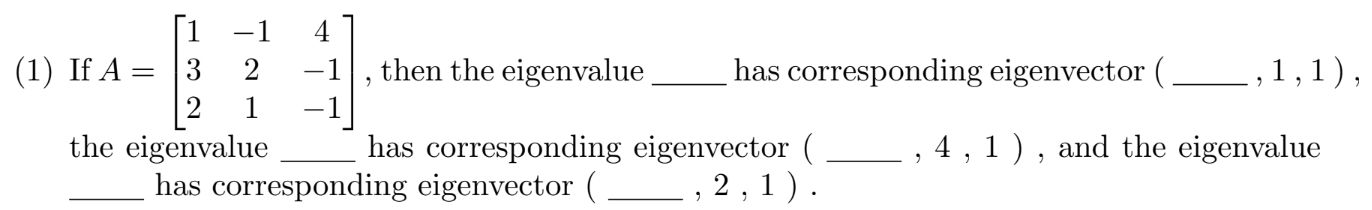

In [ ]:
# eigenvectors with sympy
A = Matrix(np.matrix('1,-1,4;3,2,-1;2,1,-1'))
A

Matrix([
[1, -1,  4],
[3,  2, -1],
[2,  1, -1]])

In [ ]:
eprint(A.eigenvects())

eigenvalue = -2, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 1, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 3, multiplicity: 1


<IPython.core.display.Math object>

In [ ]:
ansprint("-2, -1, 1, -1, 3, 1")

***********************************--ANSWER--***********************************

-2, -1, 1, -1, 3, 1

***********************************--ANSWER--***********************************


# Exercise 2

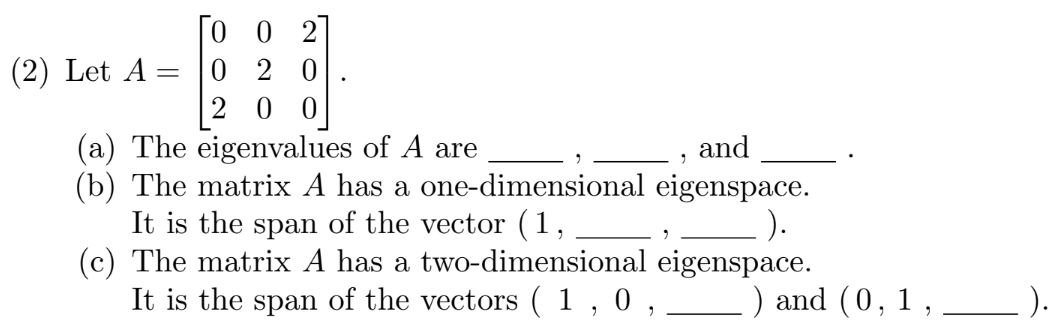

In [ ]:
A = Matrix(np.matrix('0 0 2;0 2 0;2 0 0'))
eprint(A.eigenvects())

eigenvalue = -2, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 2, multiplicity: 2


<IPython.core.display.Math object>

In [ ]:
A.diagonalize() # give P (with eigenvectors) and D (with eigenvalues)

(Matrix([
 [-1, 0, 1],
 [ 0, 1, 0],
 [ 1, 0, 1]]),
 Matrix([
 [-2, 0, 0],
 [ 0, 2, 0],
 [ 0, 0, 2]]))

In [ ]:
ansprint("""
(a) the eigenvalues are -2, 2, and 2
(b) the 1d eigenspace is the span of (1, 0, -1)
(c) the 2d eigenspace is the span of (1, 0, 1) and (0, 1, 0)
""")

***********************************--ANSWER--***********************************


(a) the eigenvalues are -2, 2, and 2
(b) the 1d eigenspace is the span of (1, 0, -1)
(c) the 2d eigenspace is the span of (1, 0, 1) and (0, 1, 0)


***********************************--ANSWER--***********************************


# Exercise 3

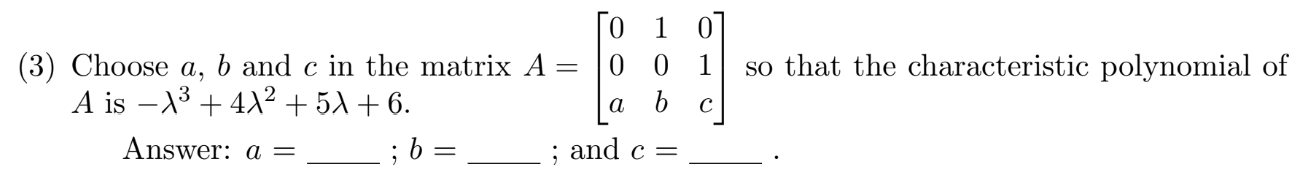

In [ ]:
# use sympy
A = Matrix([[0,1,0],[0,0,1],[a,b,c]])
A

Matrix([
[0, 1, 0],
[0, 0, 1],
[a, b, c]])

In [ ]:
A.charpoly()

PurePoly(lambda**3 - c*lambda**2 - b*lambda - a, lambda, domain='ZZ[a,b,c]')

In [ ]:
# multiply by -1 to get a, b, c for the answer
ansprint("a = 6, b = 5, c = 4")

***********************************--ANSWER--***********************************

a = 6, b = 5, c = 4

***********************************--ANSWER--***********************************


In [ ]:
Ans = Matrix([[0,1,0],[0,0,1],[6,5,4]])
Ans.charpoly()

PurePoly(lambda**3 - 4*lambda**2 - 5*lambda - 6, lambda, domain='ZZ')

# Exercise 4

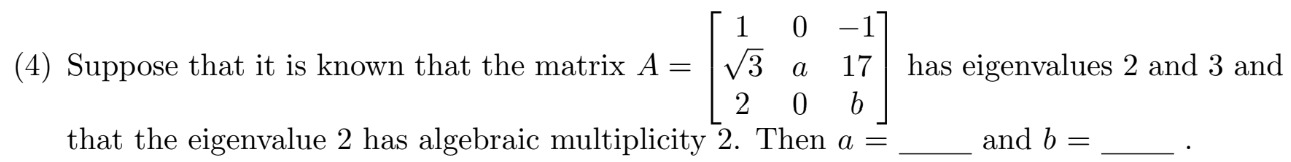

In [ ]:
# let's try to solve with sympy
A = Matrix([[1, 0, -1],[sqrt(3), a, 17], [2, 0, b]])
mprint(A)
P, D = A.diagonalize()
mprint(P)
mprint(D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# try a = 2 and b = 4
Ans = Matrix([[1, 0, -1],[sqrt(3), 2, 17], [2, 0, 4]])
mprint(Ans)
Ans.eigenvals()

<IPython.core.display.Math object>

{3: 1, 2: 2}

In [ ]:
ansprint("a = 2, b = 4 (however, matrix is not diagonizable)")

***********************************--ANSWER--***********************************

a = 2, b = 4 (however, matrix is not diagonizable)

***********************************--ANSWER--***********************************


# Exercise 5

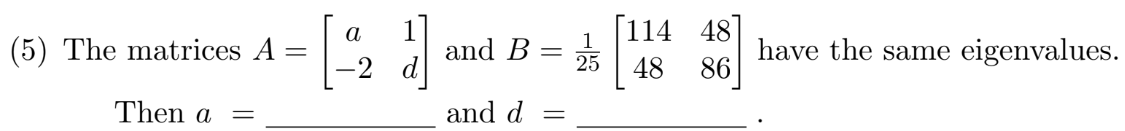

In [ ]:
A = Matrix([[a,1],[-2,d]])
B = Matrix([[114,48],[48,86]])
print(B.eigenvals())
print((Rational(1,25)*B).eigenvals())

{150: 1, 50: 1}
{6: 1, 2: 1}


In [ ]:
eigvals = A.eigenvals()

In [ ]:
for exp in eigvals.keys():
    print(simplify(exp))

a/2 + d/2 - sqrt(a**2 - 2*a*d + d**2 - 8)/2
a/2 + d/2 + sqrt(a**2 - 2*a*d + d**2 - 8)/2


In [ ]:
# solve with sympy
# Define the equations
eq1 = Eq(a/2 + d/2 - sqrt(a**2 - 2*a*d + d**2 - 8)/2, 2)
eq2 = Eq(a/2 + d/2 + sqrt(a**2 - 2*a*d + d**2 - 8)/2, 6)

# Solve the system
solution = solve((eq1, eq2), (a, d))
solution

[(4 - sqrt(6), sqrt(6) + 4), (sqrt(6) + 4, 4 - sqrt(6))]

In [ ]:
# test the solution
Ans = Matrix([[4 - sqrt(6),1],[-2,sqrt(6) + 4]])
mprint(Ans)
Ans.eigenvals()

<IPython.core.display.Math object>

{6: 1, 2: 1}

In [ ]:
ansprint("a = 4 - sqrt(6), b = 4 + sqrt(6)")

***********************************--ANSWER--***********************************

a = 4 - sqrt(6), b = 4 + sqrt(6)

***********************************--ANSWER--***********************************


In [ ]:
# the answer in the problem says a = 2, b = 6, let's check that
Erd = Matrix([[2,1],[-2,6]])
mprint(Erd)
Erd.eigenvals()

<IPython.core.display.Math object>

{4 - sqrt(2): 1, sqrt(2) + 4: 1}

In [ ]:
# that doesn't work. I think the answer key is wrong.

# Exercise 6

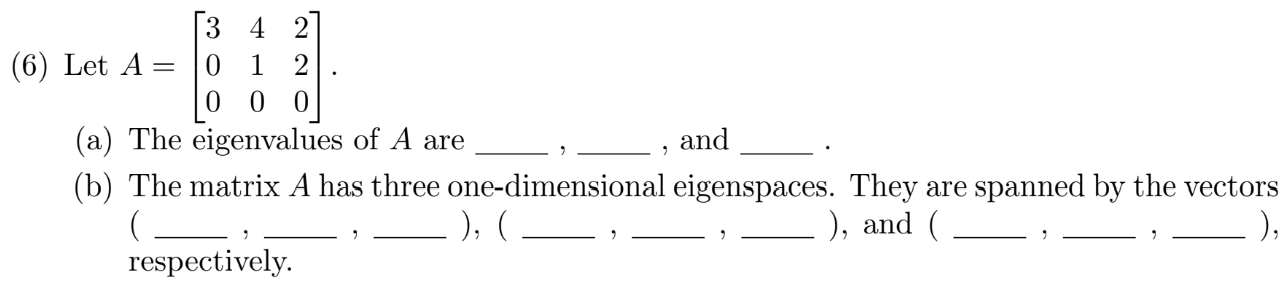

In [ ]:
A = Matrix(np.matrix('3 4 2;0 1 2;0 0 0'))
eprint(A.eigenvects())

eigenvalue = 0, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 1, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 3, multiplicity: 1


<IPython.core.display.Math object>

In [ ]:
A.diagonalize()

(Matrix([
 [ 2, -2, 1],
 [-2,  1, 0],
 [ 1,  0, 0]]),
 Matrix([
 [0, 0, 0],
 [0, 1, 0],
 [0, 0, 3]]))

In [ ]:
ansprint("""
(a) the eigenvalues of A are 0, 1, and 3
(b) the vectors are (2, -2, 1), (-2, 1, 0), and (1, 0, 0)
""")

***********************************--ANSWER--***********************************


(a) the eigenvalues of A are 0, 1, and 3
(b) the vectors are (2, -2, 1), (-2, 1, 0), and (1, 0, 0)


***********************************--ANSWER--***********************************


# Exercise 7

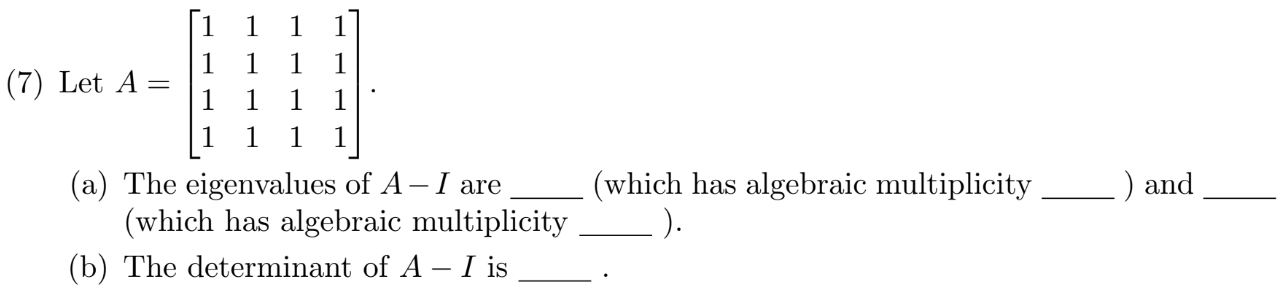

In [ ]:
A = Matrix.ones(4)
A

Matrix([
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1]])

In [ ]:
B = A - Matrix.eye(4)
B

Matrix([
[0, 1, 1, 1],
[1, 0, 1, 1],
[1, 1, 0, 1],
[1, 1, 1, 0]])

In [ ]:
B.diagonalize()

(Matrix([
 [-1, -1, -1, 1],
 [ 1,  0,  0, 1],
 [ 0,  1,  0, 1],
 [ 0,  0,  1, 1]]),
 Matrix([
 [-1,  0,  0, 0],
 [ 0, -1,  0, 0],
 [ 0,  0, -1, 0],
 [ 0,  0,  0, 3]]))

In [ ]:
B.det()

-3

In [ ]:
ansprint("""
(a) The eigenvalues of A-I are -1 (multiplicity 3) and 3 (multiplicity 1).
(b) The determinant of A-I is -3.
""")

***********************************--ANSWER--***********************************


(a) The eigenvalues of A-I are -1 (multiplicity 3) and 3 (multiplicity 1).
(b) The determinant of A-I is -3.


***********************************--ANSWER--***********************************


# Exercise 8

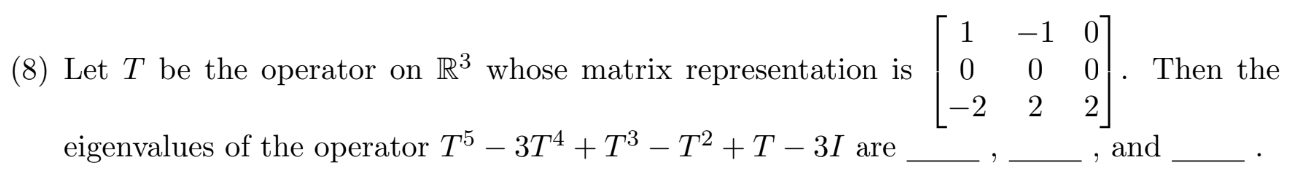

In [ ]:
T = Matrix(np.matrix('1 -1 0;0 0 0;-2 2 2'))
T

Matrix([
[ 1, -1, 0],
[ 0,  0, 0],
[-2,  2, 2]])

In [ ]:
U = T**5 - 3*T**4 + T**3 - T**2 + T - 3*Matrix.eye(3)
U

Matrix([
[-4,   1,   0],
[ 0,  -3,   0],
[18, -18, -13]])

In [ ]:
U.eigenvals()

{-3: 1, -4: 1, -13: 1}

In [ ]:
ansprint("-3, -4, -13")

***********************************--ANSWER--***********************************

-3, -4, -13

***********************************--ANSWER--***********************************


# Problem 1

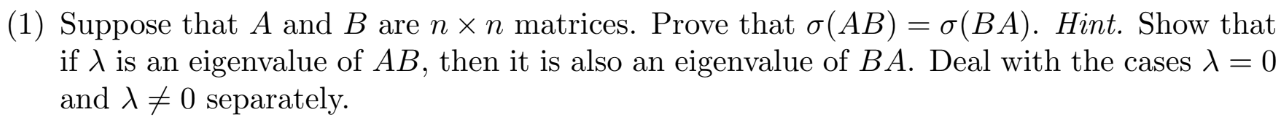

In [ ]:
# skipped it because it's a proof

# Problem 2

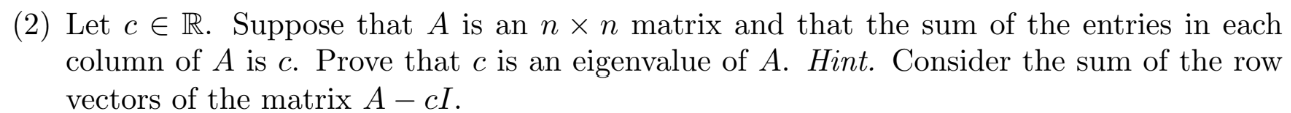

In [ ]:
# skipped -- proof

# Problem 3

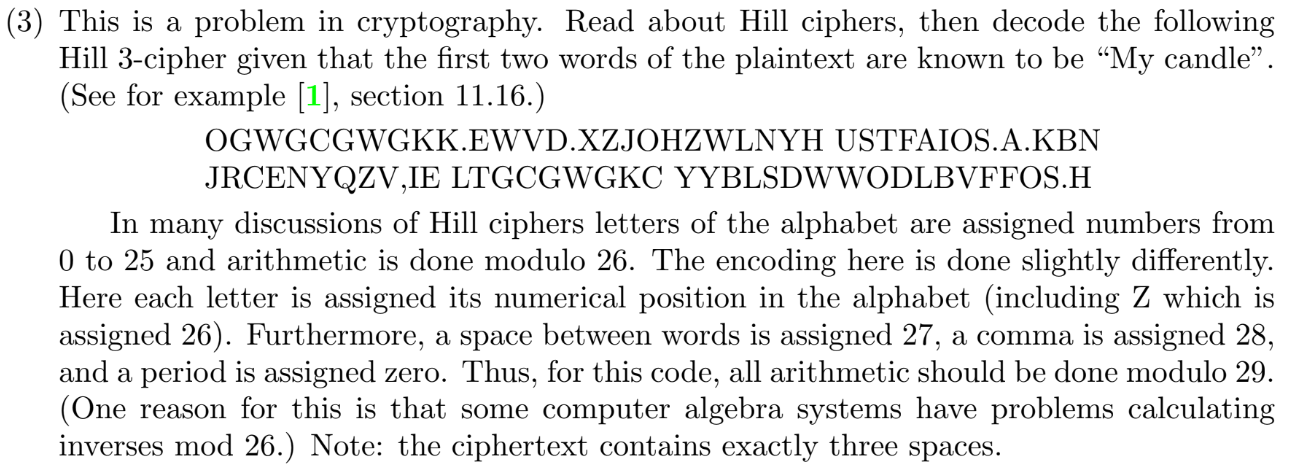

In [15]:
# text from PDF
ctext = "OGWGCGWGKK.EWVD.XZJOHZWLNYH USTFAIOS.A.KBNJRCENYQZV,IE LTGCGWGKC YYBLSDWWODLBVFFOS.H"
print(f"number of 3-letter blocks: {len(ctext)/3}")
pcracked = "MY CANDLE"

number of 3-letter blocks: 28.0


In [7]:
# Conversion from letters to numbers
conv = ".ABCDEFGHIJKLMNOPQRSTUVWXYZ ,"
len(conv)

29

In [22]:
# create 28x3 matrix of cypher
clist = [conv.index(x) for x in ctext]
print(clist)
print("---in a matrix with first three letters in first row---")
C28 = Matrix(28,3,clist)
C28

[15, 7, 23, 7, 3, 7, 23, 7, 11, 11, 0, 5, 23, 22, 4, 0, 24, 26, 10, 15, 8, 26, 23, 12, 14, 25, 8, 27, 21, 19, 20, 6, 1, 9, 15, 19, 0, 1, 0, 11, 2, 14, 10, 18, 3, 5, 14, 25, 17, 26, 22, 28, 9, 5, 27, 12, 20, 7, 3, 7, 23, 7, 11, 3, 27, 25, 25, 2, 12, 19, 4, 23, 23, 15, 4, 12, 2, 22, 6, 6, 15, 19, 0, 8]
---in a matrix with first three letters in first row---


Matrix([
[15,  7, 23],
[ 7,  3,  7],
[23,  7, 11],
[11,  0,  5],
[23, 22,  4],
[ 0, 24, 26],
[10, 15,  8],
[26, 23, 12],
[14, 25,  8],
[27, 21, 19],
[20,  6,  1],
[ 9, 15, 19],
[ 0,  1,  0],
[11,  2, 14],
[10, 18,  3],
[ 5, 14, 25],
[17, 26, 22],
[28,  9,  5],
[27, 12, 20],
[ 7,  3,  7],
[23,  7, 11],
[ 3, 27, 25],
[25,  2, 12],
[19,  4, 23],
[23, 15,  4],
[12,  2, 22],
[ 6,  6, 15],
[19,  0,  8]])

In [23]:
# create C3 and P3 in the same way: these will be used to get the Key
plist = [conv.index(x) for x in pcracked]
P3 = Matrix(3,3,plist)
mprint(P3)
print()
C3 = C28[0:3,0:3]
mprint(C3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
# symbolic K, multiply P columns separatelty by K to get equations
# lets make symbolic K
k11, k12, k13, k21, k22, k23, k31, k32, k33 = symbols('k11, k12, k13, k21, k22, k23, k31, k32, k33')
Ksym = Matrix([[k11, k12, k13], [k21, k22, k23], [k31, k32, k33]])
mprint(Ksym)
# equations for first column of plain letters
mprint(P3[0,:] * Ksym)
mprint(P3[1,:] * Ksym)
mprint(P3[2,:] * Ksym)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
# Build 9x9 matrix from equations above, columns are k11, k12, k13, k21, k22, k23, k31, k32, k33
# create 9x9 matrix
M99 = Matrix.zeros(9)
for row in range(3):
    for col in range(3):
        val = P3[row,col]
        for i in range(3):
            M99[row+i*3,col*3+i] = val
# C9 is the nine values of the cypher for the 9x1 matrix of results (M99 * k-matrix = C9)
C9 = Matrix(9,1,clist[0:9])
# augmented matrix
Aug = Matrix.hstack(M99,C9)
display(Math(r"\quad".join([latex(M99), latex(C9), latex(Aug)])))

<IPython.core.display.Math object>

In [38]:
# Now I just need to do Gaussian elimination with mod 29
# use .mod_scale, .mod_replace, .row_switch operations
a1 = Aug.mod_scale(1, 9); a1

Matrix([
[1,  0,  0, 22,  0,  0, 11,  0,  0, 19],
[3,  0,  0,  1,  0,  0, 14,  0,  0,  7],
[4,  0,  0, 12,  0,  0,  5,  0,  0, 23],
[0, 13,  0,  0, 25,  0,  0, 27,  0,  7],
[0,  3,  0,  0,  1,  0,  0, 14,  0,  3],
[0,  4,  0,  0, 12,  0,  0,  5,  0,  7],
[0,  0, 13,  0,  0, 25,  0,  0, 27, 23],
[0,  0,  3,  0,  0,  1,  0,  0, 14,  7],
[0,  0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [39]:
a2 = a1.mod_replace(2, -3, 1); a2

Matrix([
[1,  0,  0, 22,  0,  0, 11,  0,  0, 19],
[0,  0,  0, 22,  0,  0, 10,  0,  0,  8],
[4,  0,  0, 12,  0,  0,  5,  0,  0, 23],
[0, 13,  0,  0, 25,  0,  0, 27,  0,  7],
[0,  3,  0,  0,  1,  0,  0, 14,  0,  3],
[0,  4,  0,  0, 12,  0,  0,  5,  0,  7],
[0,  0, 13,  0,  0, 25,  0,  0, 27, 23],
[0,  0,  3,  0,  0,  1,  0,  0, 14,  7],
[0,  0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [40]:
a3 = a2.mod_replace(3, -4, 1); a3

Matrix([
[1,  0,  0, 22,  0,  0, 11,  0,  0, 19],
[0,  0,  0, 22,  0,  0, 10,  0,  0,  8],
[0,  0,  0, 11,  0,  0, 19,  0,  0,  5],
[0, 13,  0,  0, 25,  0,  0, 27,  0,  7],
[0,  3,  0,  0,  1,  0,  0, 14,  0,  3],
[0,  4,  0,  0, 12,  0,  0,  5,  0,  7],
[0,  0, 13,  0,  0, 25,  0,  0, 27, 23],
[0,  0,  3,  0,  0,  1,  0,  0, 14,  7],
[0,  0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [41]:
a4 = a3.row_switch(2,4); a4

Matrix([
[1,  0,  0, 22,  0,  0, 11,  0,  0, 19],
[0, 13,  0,  0, 25,  0,  0, 27,  0,  7],
[0,  0,  0, 11,  0,  0, 19,  0,  0,  5],
[0,  0,  0, 22,  0,  0, 10,  0,  0,  8],
[0,  3,  0,  0,  1,  0,  0, 14,  0,  3],
[0,  4,  0,  0, 12,  0,  0,  5,  0,  7],
[0,  0, 13,  0,  0, 25,  0,  0, 27, 23],
[0,  0,  3,  0,  0,  1,  0,  0, 14,  7],
[0,  0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [42]:
a5 = a4.mod_scale(2, 9); a5

Matrix([
[1, 0,  0, 22,  0,  0, 11,  0,  0, 19],
[0, 1,  0,  0, 22,  0,  0, 11,  0,  5],
[0, 0,  0, 11,  0,  0, 19,  0,  0,  5],
[0, 0,  0, 22,  0,  0, 10,  0,  0,  8],
[0, 3,  0,  0,  1,  0,  0, 14,  0,  3],
[0, 4,  0,  0, 12,  0,  0,  5,  0,  7],
[0, 0, 13,  0,  0, 25,  0,  0, 27, 23],
[0, 0,  3,  0,  0,  1,  0,  0, 14,  7],
[0, 0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [43]:
a6 = a5.mod_replace(5, -3, 2); a6

Matrix([
[1, 0,  0, 22,  0,  0, 11,  0,  0, 19],
[0, 1,  0,  0, 22,  0,  0, 11,  0,  5],
[0, 0,  0, 11,  0,  0, 19,  0,  0,  5],
[0, 0,  0, 22,  0,  0, 10,  0,  0,  8],
[0, 0,  0,  0, 22,  0,  0, 10,  0, 17],
[0, 4,  0,  0, 12,  0,  0,  5,  0,  7],
[0, 0, 13,  0,  0, 25,  0,  0, 27, 23],
[0, 0,  3,  0,  0,  1,  0,  0, 14,  7],
[0, 0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [44]:
a7 = a6.mod_replace(6, -4, 2); a7

Matrix([
[1, 0,  0, 22,  0,  0, 11,  0,  0, 19],
[0, 1,  0,  0, 22,  0,  0, 11,  0,  5],
[0, 0,  0, 11,  0,  0, 19,  0,  0,  5],
[0, 0,  0, 22,  0,  0, 10,  0,  0,  8],
[0, 0,  0,  0, 22,  0,  0, 10,  0, 17],
[0, 0,  0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 13,  0,  0, 25,  0,  0, 27, 23],
[0, 0,  3,  0,  0,  1,  0,  0, 14,  7],
[0, 0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [45]:
a8 = a7.row_switch(3, 7); a8

Matrix([
[1, 0,  0, 22,  0,  0, 11,  0,  0, 19],
[0, 1,  0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 13,  0,  0, 25,  0,  0, 27, 23],
[0, 0,  0, 22,  0,  0, 10,  0,  0,  8],
[0, 0,  0,  0, 22,  0,  0, 10,  0, 17],
[0, 0,  0,  0, 11,  0,  0, 19,  0, 16],
[0, 0,  0, 11,  0,  0, 19,  0,  0,  5],
[0, 0,  3,  0,  0,  1,  0,  0, 14,  7],
[0, 0,  4,  0,  0, 12,  0,  0,  5, 11]])

In [46]:
a9 = a8.mod_scale(3, 9); a9

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0, 22,  0,  0, 10,  0,  0,  8],
[0, 0, 0,  0, 22,  0,  0, 10,  0, 17],
[0, 0, 0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 0, 11,  0,  0, 19,  0,  0,  5],
[0, 0, 3,  0,  0,  1,  0,  0, 14,  7],
[0, 0, 4,  0,  0, 12,  0,  0,  5, 11]])

In [47]:
a10 = a9.mod_replace(8, -3, 3); a10

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0, 22,  0,  0, 10,  0,  0,  8],
[0, 0, 0,  0, 22,  0,  0, 10,  0, 17],
[0, 0, 0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 0, 11,  0,  0, 19,  0,  0,  5],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 4,  0,  0, 12,  0,  0,  5, 11]])

In [48]:
a11 = a10.mod_replace(9, -4, 3); a11

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0, 22,  0,  0, 10,  0,  0,  8],
[0, 0, 0,  0, 22,  0,  0, 10,  0, 17],
[0, 0, 0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 0, 11,  0,  0, 19,  0,  0,  5],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [49]:
a12 = a11.mod_scale(4, 4); a12

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0, 22,  0,  0, 10,  0, 17],
[0, 0, 0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 0, 11,  0,  0, 19,  0,  0,  5],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [50]:
a13 = a12.mod_replace(7, -11, 4); a13

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0, 22,  0,  0, 10,  0, 17],
[0, 0, 0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 0,  0,  0,  0, 14,  0,  0,  1],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [51]:
a14 = a13.mod_scale(5, 4); a14

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0, 11,  0,  0, 19,  0, 16],
[0, 0, 0,  0,  0,  0, 14,  0,  0,  1],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [52]:
a15 = a14.mod_replace(6, -11, 5); a15

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  0,  0, 14,  0, 22],
[0, 0, 0,  0,  0,  0, 14,  0,  0,  1],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [53]:
a16 = a15.row_switch(6, 8); a16

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0, 22,  0,  0, 10, 24],
[0, 0, 0,  0,  0,  0, 14,  0,  0,  1],
[0, 0, 0,  0,  0,  0,  0, 14,  0, 22],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [54]:
a17 = a16.mod_scale(6, 4); a17

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  1,  0,  0, 11,  9],
[0, 0, 0,  0,  0,  0, 14,  0,  0,  1],
[0, 0, 0,  0,  0,  0,  0, 14,  0, 22],
[0, 0, 0,  0,  0, 11,  0,  0, 19, 24]])

In [55]:
a18 = a17.mod_replace(9, -11, 6); a18

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  1,  0,  0, 11,  9],
[0, 0, 0,  0,  0,  0, 14,  0,  0,  1],
[0, 0, 0,  0,  0,  0,  0, 14,  0, 22],
[0, 0, 0,  0,  0,  0,  0,  0, 14, 12]])

In [56]:
a19 = a18.mod_scale(7, 27); a19

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  1,  0,  0, 11,  9],
[0, 0, 0,  0,  0,  0,  1,  0,  0, 27],
[0, 0, 0,  0,  0,  0,  0, 14,  0, 22],
[0, 0, 0,  0,  0,  0,  0,  0, 14, 12]])

In [57]:
a20 = a19.mod_scale(8, 27); a20

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  1,  0,  0, 11,  9],
[0, 0, 0,  0,  0,  0,  1,  0,  0, 27],
[0, 0, 0,  0,  0,  0,  0,  1,  0, 14],
[0, 0, 0,  0,  0,  0,  0,  0, 14, 12]])

In [59]:
a21 = a20.mod_scale(9, 27); a21

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  1,  0,  0, 11,  9],
[0, 0, 0,  0,  0,  0,  1,  0,  0, 27],
[0, 0, 0,  0,  0,  0,  0,  1,  0, 14],
[0, 0, 0,  0,  0,  0,  0,  0,  1,  5]])

In [60]:
a22 = a21.mod_replace(6, -11, 9); a22

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0, 11,  0, 10],
[0, 0, 0,  0,  0,  1,  0,  0,  0, 12],
[0, 0, 0,  0,  0,  0,  1,  0,  0, 27],
[0, 0, 0,  0,  0,  0,  0,  1,  0, 14],
[0, 0, 0,  0,  0,  0,  0,  0,  1,  5]])

In [61]:
a23 = a22.mod_replace(5, -11, 8); a23

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0, 11,  0,  0,  3],
[0, 0, 0,  0,  1,  0,  0,  0,  0,  1],
[0, 0, 0,  0,  0,  1,  0,  0,  0, 12],
[0, 0, 0,  0,  0,  0,  1,  0,  0, 27],
[0, 0, 0,  0,  0,  0,  0,  1,  0, 14],
[0, 0, 0,  0,  0,  0,  0,  0,  1,  5]])

In [62]:
a24 = a23.mod_replace(4, -11, 7); a24

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0,  0, 19],
[0, 1, 0,  0, 22,  0,  0, 11,  0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 11,  4],
[0, 0, 0,  1,  0,  0,  0,  0,  0, 25],
[0, 0, 0,  0,  1,  0,  0,  0,  0,  1],
[0, 0, 0,  0,  0,  1,  0,  0,  0, 12],
[0, 0, 0,  0,  0,  0,  1,  0,  0, 27],
[0, 0, 0,  0,  0,  0,  0,  1,  0, 14],
[0, 0, 0,  0,  0,  0,  0,  0,  1,  5]])

In [63]:
a25 = a24.mod_replace(3, -11, 9); a25

Matrix([
[1, 0, 0, 22,  0,  0, 11,  0, 0, 19],
[0, 1, 0,  0, 22,  0,  0, 11, 0,  5],
[0, 0, 1,  0,  0, 22,  0,  0, 0,  7],
[0, 0, 0,  1,  0,  0,  0,  0, 0, 25],
[0, 0, 0,  0,  1,  0,  0,  0, 0,  1],
[0, 0, 0,  0,  0,  1,  0,  0, 0, 12],
[0, 0, 0,  0,  0,  0,  1,  0, 0, 27],
[0, 0, 0,  0,  0,  0,  0,  1, 0, 14],
[0, 0, 0,  0,  0,  0,  0,  0, 1,  5]])

In [64]:
a26 = a25.mod_replace(3, -22, 6); a26

Matrix([
[1, 0, 0, 22,  0, 0, 11,  0, 0, 19],
[0, 1, 0,  0, 22, 0,  0, 11, 0,  5],
[0, 0, 1,  0,  0, 0,  0,  0, 0,  4],
[0, 0, 0,  1,  0, 0,  0,  0, 0, 25],
[0, 0, 0,  0,  1, 0,  0,  0, 0,  1],
[0, 0, 0,  0,  0, 1,  0,  0, 0, 12],
[0, 0, 0,  0,  0, 0,  1,  0, 0, 27],
[0, 0, 0,  0,  0, 0,  0,  1, 0, 14],
[0, 0, 0,  0,  0, 0,  0,  0, 1,  5]])

In [65]:
a27 = a26.mod_replace(2, -11, 8); a27

Matrix([
[1, 0, 0, 22,  0, 0, 11, 0, 0, 19],
[0, 1, 0,  0, 22, 0,  0, 0, 0, 25],
[0, 0, 1,  0,  0, 0,  0, 0, 0,  4],
[0, 0, 0,  1,  0, 0,  0, 0, 0, 25],
[0, 0, 0,  0,  1, 0,  0, 0, 0,  1],
[0, 0, 0,  0,  0, 1,  0, 0, 0, 12],
[0, 0, 0,  0,  0, 0,  1, 0, 0, 27],
[0, 0, 0,  0,  0, 0,  0, 1, 0, 14],
[0, 0, 0,  0,  0, 0,  0, 0, 1,  5]])

In [66]:
a28 = a27.mod_replace(2, -22, 5); a28

Matrix([
[1, 0, 0, 22, 0, 0, 11, 0, 0, 19],
[0, 1, 0,  0, 0, 0,  0, 0, 0,  3],
[0, 0, 1,  0, 0, 0,  0, 0, 0,  4],
[0, 0, 0,  1, 0, 0,  0, 0, 0, 25],
[0, 0, 0,  0, 1, 0,  0, 0, 0,  1],
[0, 0, 0,  0, 0, 1,  0, 0, 0, 12],
[0, 0, 0,  0, 0, 0,  1, 0, 0, 27],
[0, 0, 0,  0, 0, 0,  0, 1, 0, 14],
[0, 0, 0,  0, 0, 0,  0, 0, 1,  5]])

In [67]:
a29 = a28.mod_replace(1, -11, 7); a29

Matrix([
[1, 0, 0, 22, 0, 0, 0, 0, 0, 12],
[0, 1, 0,  0, 0, 0, 0, 0, 0,  3],
[0, 0, 1,  0, 0, 0, 0, 0, 0,  4],
[0, 0, 0,  1, 0, 0, 0, 0, 0, 25],
[0, 0, 0,  0, 1, 0, 0, 0, 0,  1],
[0, 0, 0,  0, 0, 1, 0, 0, 0, 12],
[0, 0, 0,  0, 0, 0, 1, 0, 0, 27],
[0, 0, 0,  0, 0, 0, 0, 1, 0, 14],
[0, 0, 0,  0, 0, 0, 0, 0, 1,  5]])

In [68]:
a30 = a29.mod_replace(1, -22, 4); a30

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 13],
[0, 1, 0, 0, 0, 0, 0, 0, 0,  3],
[0, 0, 1, 0, 0, 0, 0, 0, 0,  4],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 25],
[0, 0, 0, 0, 1, 0, 0, 0, 0,  1],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 12],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 27],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 14],
[0, 0, 0, 0, 0, 0, 0, 0, 1,  5]])

In [70]:
kvect = a30[0:9,9:10]; kvect

Matrix([
[13],
[ 3],
[ 4],
[25],
[ 1],
[12],
[27],
[14],
[ 5]])

In [71]:
K = Matrix(3,3,list(kvect))
K

Matrix([
[13,  3,  4],
[25,  1, 12],
[27, 14,  5]])

In [106]:
def letters(M):
    res = ""
    for row in range(M.rows):
        for col in range(3):
            res = res + conv[(M[row,col])]
    return res

In [107]:
# check if P3*K gives C3
mprint(P3*K % 29)
mprint(C3)
print(letters(C3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

OGWGCGWGK


In [90]:
# need to find the inverse of K with mod 29
KI = Matrix.hstack(K, Matrix.eye(3))
KI

Matrix([
[13,  3,  4, 1, 0, 0],
[25,  1, 12, 0, 1, 0],
[27, 14,  5, 0, 0, 1]])

In [91]:
b1 = KI.mod_scale(1, 9); b1

Matrix([
[ 1, 27,  7, 9, 0, 0],
[25,  1, 12, 0, 1, 0],
[27, 14,  5, 0, 0, 1]])

In [92]:
b2 = b1.mod_replace(2, -25, 1); b2

Matrix([
[ 1, 27,  7, 9, 0, 0],
[ 0, 22, 11, 7, 1, 0],
[27, 14,  5, 0, 0, 1]])

In [93]:
b3 = b2.mod_replace(3, -27, 1); b3

Matrix([
[1, 27,  7,  9, 0, 0],
[0, 22, 11,  7, 1, 0],
[0, 10, 19, 18, 0, 1]])

In [94]:
b4 = b3.mod_scale(2, 4); b4

Matrix([
[1, 27,  7,  9, 0, 0],
[0,  1, 15, 28, 4, 0],
[0, 10, 19, 18, 0, 1]])

In [95]:
b5 = b4.mod_replace(3, -10, 2); b5

Matrix([
[1, 27,  7,  9,  0, 0],
[0,  1, 15, 28,  4, 0],
[0,  0, 14, 28, 18, 1]])

In [96]:
b6 = b5.mod_scale(3, 27); b6

Matrix([
[1, 27,  7,  9,  0,  0],
[0,  1, 15, 28,  4,  0],
[0,  0,  1,  2, 22, 27]])

In [97]:
b7 = b6.mod_replace(2, -15, 3); b7

Matrix([
[1, 27, 7,  9,  0,  0],
[0,  1, 0, 27, 22,  1],
[0,  0, 1,  2, 22, 27]])

In [98]:
b8 = b7.mod_replace(1, -7, 3); b8

Matrix([
[1, 27, 0, 24, 20, 14],
[0,  1, 0, 27, 22,  1],
[0,  0, 1,  2, 22, 27]])

In [99]:
b9 = b8.mod_replace(1, -27, 2); b9

Matrix([
[1, 0, 0, 20,  6, 16],
[0, 1, 0, 27, 22,  1],
[0, 0, 1,  2, 22, 27]])

In [108]:
Kinv = b9[0:3,3:6]
mprint(Kinv)
# check that is really is the inverse
Kinv * K % 29 # gives the identity matrix

<IPython.core.display.Math object>

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [109]:
# check if inverse of K can decode C3
mprint(C3*Kinv % 29)
print(letters(C3*Kinv % 29))

<IPython.core.display.Math object>

MY CANDLE


In [110]:
# OK, let's see if we can decode the entire message now!
print(letters(C28*Kinv % 29))

MY CANDLE BURNED ALONE IN AN IMMENSE VALLEY. FROM VALLEY CANDLE BY WALLACE STEVENS. 


In [111]:
ansprint(f"The decoded text is: {letters(C28*Kinv % 29)}")

***********************************--ANSWER--***********************************

The decoded text is: MY CANDLE BURNED ALONE IN AN IMMENSE VALLEY. FROM VALLEY CANDLE BY WALLACE STEVENS. 

***********************************--ANSWER--***********************************
